| ESCUELA POLITÉCNICA NACIONAL  |                              | Tarea No. |
|-------------------------------|------------------------------|--------------|
| **Metodos Numericos – Computación**     | | **9**        |
| NOMBRE: Ivonne Carolina Ayala |                              |              |


# [Tarea 09] Ejercicios Unidad 04-A-B | Eliminación gaussiana vs Gauss-Jordan

## Conjunto de Ejercicios

#### 1. Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos. Explique los resultados desde un punto de vista geométrico.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_system(x_vals, y_vals, eqs, title):
    plt.figure()
    for y, label in zip(y_vals, eqs):
        plt.plot(x_vals, y, label=label)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.title(title)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.show()

a. 
$$
x_1 + 2x_2 = 0,
\quad
x_1 - x_2 = 0.
$$

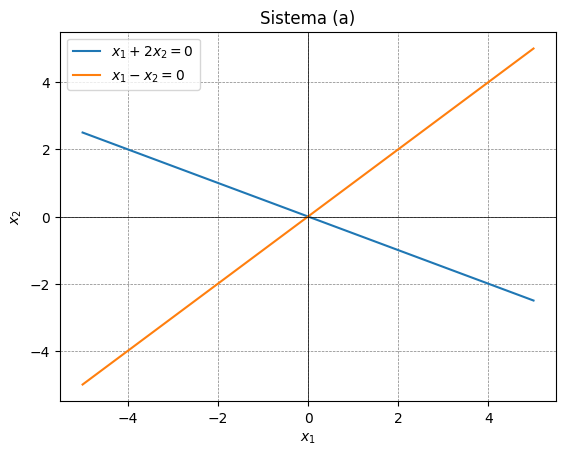

In [3]:
x_vals = np.linspace(-5, 5, 400)
y1_a = -x_vals / 2
y2_a = x_vals
plot_system(
    x_vals, [y1_a, y2_a], 
    ["$x_1 + 2x_2 = 0$", "$x_1 - x_2 = 0$"], 
    "Sistema (a)"
)


b.
$$
x_1 + 2x_2 = 3,
\quad
-2x_1 - 4x_2 = 6.
$$

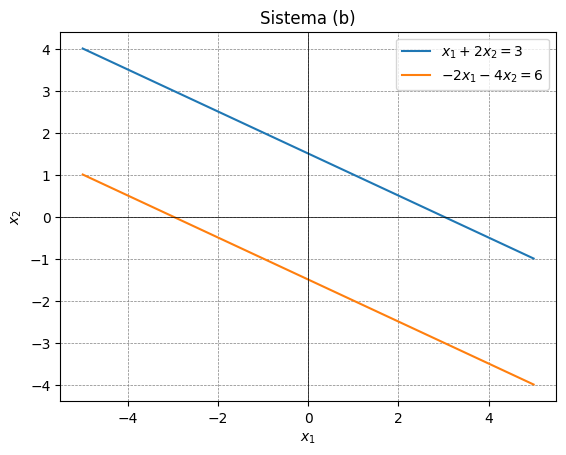

In [4]:
y1_b = (3 - x_vals) / 2
y2_b = (6 + 2 * x_vals) / -4
plot_system(
    x_vals, [y1_b, y2_b], 
    ["$x_1 + 2x_2 = 3$", "$-2x_1 - 4x_2 = 6$"], 
    "Sistema (b)"
)

c.
$$
2x_1 + x_2 = -1,
\quad
x_1 + x_2 = 2,
\quad
x_1 - 3x_2 = 5.
$$

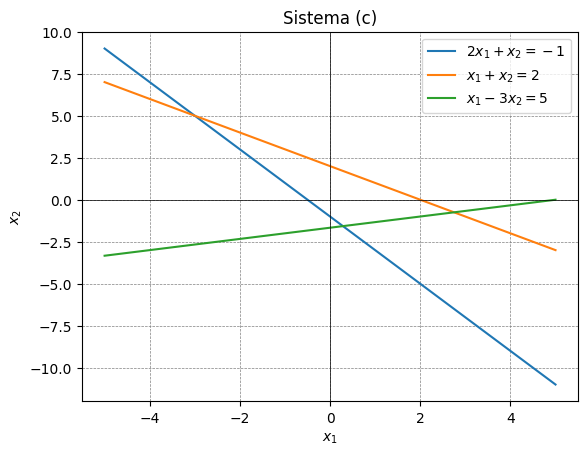

In [5]:
# Literal (c)
y1_c = (-1 - 2 * x_vals)
y2_c = (2 - x_vals)
y3_c = (5 - x_vals) / -3
plot_system(
    x_vals, [y1_c, y2_c, y3_c], 
    ["$2x_1 + x_2 = -1$", "$x_1 + x_2 = 2$", "$x_1 - 3x_2 = 5$"], 
    "Sistema (c)"
)

d.
$$
2x_1 + x_2 + x_3 = 1,
\quad
2x_1 + 4x_2 - x_3 = -1.
$$


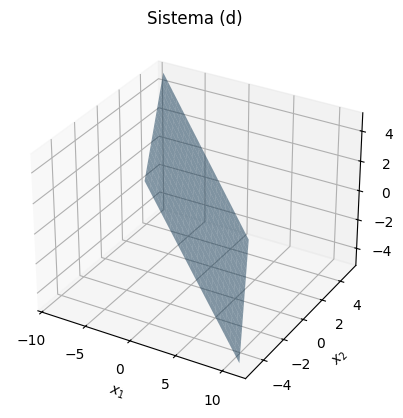

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def plane_x1(x2, x3): 
    return 1 - x2 - x3

def plane_x2(x1, x3): 
    return (1 - x1 - x3) / 4

x2_vals = np.linspace(-5, 5, 20)
x3_vals = np.linspace(-5, 5, 20)
x2_grid, x3_grid = np.meshgrid(x2_vals, x3_vals)

x1_plane = plane_x1(x2_grid, x3_grid)
x2_plane = plane_x2(x1_plane, x3_grid)

ax.plot_surface(x1_plane, x2_grid, x3_grid, alpha=0.5, label="$2x_1 + x_2 + x_3 = 1$")
ax.set_title("Sistema (d)")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()



#### 2. Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver los siguientes sistemas lineales. No reordene las ecuaciones.

(La solución exacta para cada sistema es $x_1 = -1$, $x_2 = 2$, $x_3 = 3$.)



In [29]:
def gaussian_elimination_with_rounding(A, b):
    n = len(b)
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    
    for i in range(n):
        pivot = A[i, i]
        A[i, :] = np.round(A[i, :] / pivot, 2)
        b[i] = np.round(b[i] / pivot, 2)
        
        for j in range(i + 1, n):
            factor = A[j, i]
            A[j, :] = np.round(A[j, :] - factor * A[i, :], 2)
            b[j] = np.round(b[j] - factor * b[i], 2)
    
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = np.round((b[i] - np.dot(A[i, i + 1:], x[i + 1:])), 2)
    
    return x


a.
$$
-x_1 + 4x_2 + x_3 = 8,
\quad
5x_1 + 2x_2 + 4x_3 = 11.
$$


In [23]:
A_a = [
    [-1, 4, 1],
    [5/3, 2/3, 2/3],
    [2, 1, 4]
]
b_a = [8, 1, 11]

solution_a = gaussian_elimination_with_rounding(A_a, b_a)

solution_a


array([-1.05,  0.98,  3.03])

b.
$$
4x_1 + 2x_2 - x_3 = -5,
\quad
x_1 + 4x_2 + 2x_3 = 9.
$$

In [10]:
# Literal (b)
A_b = [
    [4, 2, -1],
    [1/9, 1/9, -1/3],
    [1, 4, 2]
]
b_b = [-5, -1, 9]

solution_b = gaussian_elimination_with_rounding(A_b, b_b)

solution_b

array([-1.02,  1.02,  2.97])

#### 3. Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y determine si se necesitan intercambios de fila:


In [28]:
def gaussian_elimination_with_pivoting(A, b):
    n = len(b)
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    swaps = []

    for i in range(n):
        max_row = np.argmax(np.abs(A[i:, i])) + i
        if max_row != i:
            A[[i, max_row]] = A[[max_row, i]]
            b[[i, max_row]] = b[[max_row, i]]
            swaps.append((i, max_row))

        pivot = A[i, i]
        A[i, :] /= pivot
        b[i] /= pivot

        for j in range(i + 1, n):
            factor = A[j, i]
            A[j, :] -= factor * A[i, :]
            b[j] -= factor * b[i]

    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = b[i] - np.dot(A[i, i + 1:], x[i + 1:])

    return x, swaps

a.
$$
x_1 - x_2 + 3x_3 = 2,
\quad
3x_1 - 3x_2 + x_3 = -1,
\quad
x_1 + x_2 = 3.
$$


In [22]:
A_a = [
    [1, -1, 3],
    [3, -3, 1],
    [1, 1, 0]
]
b_a = [2, -1, 3]

solution_a, swaps_a = gaussian_elimination_with_pivoting(A_a, b_a)
(solution_a, swaps_a)



(array([1.1875, 1.8125, 0.875 ]), [(0, np.int64(1)), (1, np.int64(2))])

b.
$$
2x_1 - 1.5x_2 + 3x_3 = 1,
\quad
-x_1 + 2x_3 = 3,
\quad
4x_1 - 4.5x_2 + 5x_3 = 1.
$$


In [20]:
A_b = [
    [2, -1.5, 3],
    [-1, 0, 2],
    [4, -4.5, 5]
]
b_b = [1, 3, 1]
solution_b, swaps_b = gaussian_elimination_with_pivoting(A_b, b_b)
(solution_b, swaps_b)


(array([-1.,  0.,  1.]), [(0, np.int64(2))])

c.
$$
2x_1 = 3,
\quad
x_1 + 1.5x_2 = 4.5,
\quad
-3x_2 + 0.5x_3 = -6.6.
$$


In [17]:
A_c = [
    [2, 0, 0, 0],
    [1, 1.5, 0, 0],
    [0, -3, 0.5, 0],
    [2, -2, 1, 1]
]
b_c = [3, 4.5, -6.6, 0.8]
solution_c, swaps_c = gaussian_elimination_with_pivoting(A_c, b_c)
(solution_c, swaps_c)

(array([ 1.5,  2. , -1.2,  3. ]), [(1, np.int64(2)), (2, np.int64(3))])

d.
$$
x_1 + x_2 + x_4 = 2,
\quad
2x_1 + x_2 - x_3 + x_4 = 1,
\quad
4x_1 - x_2 - 2x_3 + 2x_4 = 0,
\quad
3x_1 - x_2 - x_3 + 2x_4 = -3.
$$

In [16]:
A_d = [
    [1, 1, 1, 1],
    [2, 1, -1, -1],
    [4, -1, 2, 0],
    [3, -1, -2, 2]
]
b_d = [2, 1, 0, -3]

solution_d, swaps_d = gaussian_elimination_with_pivoting(A_d, b_d)
(solution_d, swaps_d)

(array([ 0.03030303,  1.45454545,  0.66666667, -0.15151515]),
 [(0, np.int64(2)), (2, np.int64(3))])

#### 4. Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los siguientes sistemas lineales.

a.
$$
\frac{1}{4}x_1 + \frac{1}{5}x_2 + \frac{1}{6}x_3 = 9,
\quad
\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 = 8,
\quad
\frac{1}{2}x_1 + x_2 + 2x_3 = 8.
$$


In [8]:
A_a = np.array([
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1.0, 2.0]
], dtype=np.float32)

b_a = np.array([9.0, 8.0, 8.0], dtype=np.float32)

x_a = np.linalg.solve(A_a, b_a)

print("Solución")
print(x_a)
print()

Solución
[-227.0767   476.92267 -177.69215]



b.
$$
3.333x_1 + 15920x_2 - 10.333x_3 = 15913,
\quad
2.222x_1 + 16.71x_2 + 9.612x_3 = 28.544,
\quad
1.5611x_1 + 5.1791x_2 + 1.6852x_3 = 8.4254.
$$

In [9]:
A_b = np.array([
    [3.333, 15920.0, -10.333],
    [2.222,    16.71,   9.612],
    [1.5611,   5.1791,  1.6852]
], dtype=np.float32)

b_b = np.array([15913.0, 28.544, 8.4254], dtype=np.float32)

x_b = np.linalg.solve(A_b, b_b)

print("Solución")
print(x_b)
print()

Solución
[0.99999964 1.         1.0000002 ]



c.
$$
x_1 + \frac{1}{2}x_2 + \frac{1}{3}x_3 + \frac{1}{4}x_4 = \frac{1}{6},
\quad
\frac{1}{2}x_1 + \frac{1}{3}x_2 + \frac{1}{4}x_3 + \frac{1}{5}x_4 = \frac{1}{7},
\quad
\frac{1}{3}x_1 + \frac{1}{4}x_2 + \frac{1}{5}x_3 + \frac{1}{6}x_4 = \frac{1}{8}.
$$

In [10]:
A_c = np.array([
    [ 1.0,     1/2,    1/3,    1/4 ],
    [-1/2,     1/3,    1/4,    1/5 ],
    [-1/3,     1/4,    1/5,    1/6 ],
    [-1/4,     1/5,    1/6,    1/7 ]
], dtype=np.float32)

b_c = np.array([
    1/6, 1/7, 1/8, 1/9
], dtype=np.float32)

x_c = np.linalg.solve(A_c, b_c)

print("Solución")
print(x_c)
print()

Solución
[-1.0240577e-03  3.4946290e-01 -1.8894023e+00  2.4910402e+00]



d.
$$
2x_1 + x_2 - x_3 + x_4 - 3x_5 = 7,
\quad
x_1 + 2x_3 - x_4 + x_5 = 2,
\quad
-2x_2 - x_3 + x_4 - x_5 = -5,
\quad
3x_1 + x_2 - 4x_3 + 5x_5 = 6,
\quad
x_1 - x_2 - x_3 - x_4 + x_5 = -3.
$$

Reordenada:

*  $2x1 + 1x2 - 1x3 + 1x4 - 3x5 = 7$
*   $1x1 + 0x2 + 2x3 - 1x4 + 1x5 = 2$
*   $0x1 - 2x2 - 1x3 + 1x4 - 1x5 = -5$
*   $3x1 + 1x2 - 4x3 + 0x4 + 5x5 = 6$
*   $1x1 - 2x2 - 1x3 - 1x4 + 1x5 = -3$

In [11]:
A_d = np.array([
    [ 2.0,  1.0, -1.0,  1.0, -3.0],
    [ 1.0,  0.0,  2.0, -1.0,  1.0],
    [ 0.0, -2.0, -1.0,  1.0, -1.0],
    [ 3.0,  1.0, -4.0,  0.0,  5.0],
    [ 1.0, -2.0, -1.0, -1.0,  1.0]
], dtype=np.float32)

b_d = np.array([ 7.0, 2.0, -5.0, 6.0, -3.0], dtype=np.float32)

x_d = np.linalg.solve(A_d, b_d)

print("Solución")
print(x_d)

Solución
[ 1.8974359   2.4615386   0.02564103 -0.46153846 -0.41025642]


#### 5. Dado el sistema lineal:

$$
x_1 - x_2 + \alpha x_3 = -2,
\quad
-x_1 + 2x_2 - \alpha x_3 = 3,
\quad
\alpha x_1 + x_2 + x_3 = 2.
$$

a. Encuentre el valor(es) de $\alpha$ para los que el sistema no tiene soluciones.

b. Encuentre el valor(es) de $\alpha$ para los que el sistema tiene un número infinito de soluciones.

c. Suponga que existe una única solución para una $\alpha$ determinada, encuentre la solución.


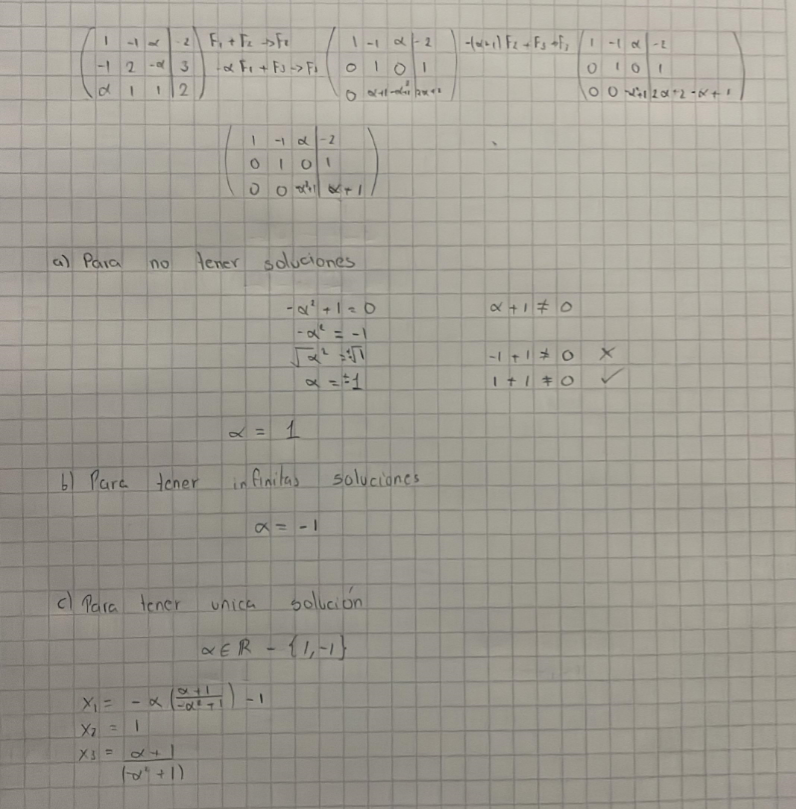

## Ejercicios Aplicados

6. Suponga que en un sistema biológico existen $n$ especies de animales y $m$ fuentes de alimento. Si $x_j$ representa la población de las $j$-ésimas especies, para cada $j = 1, \dots, n$; $b_i$ representa el suministro diario disponible del $i$-ésimo alimento y $a_{ij}$ representa la cantidad del $i$-ésimo alimento.

El sistema lineal es:
$$
a_{11}x_1 + a_{12}x_2 + \dots + a_{1n}x_n = b_1,
\quad
a_{21}x_1 + a_{22}x_2 + \dots + a_{2n}x_n = b_2,
\quad
\dots,
\quad
a_{m1}x_1 + a_{m2}x_2 + \dots + a_{mn}x_n = b_m.
$$

a. Si
$$
A = \begin{bmatrix}
1 & 2 & 0 \\
1 & 0 & 2 \\
0 & 0 & 1
\end{bmatrix},
\quad
\mathbf{x} = \begin{bmatrix}
1000 \\
500 \\
350
\end{bmatrix},
\quad
\mathbf{b} = \begin{bmatrix}
3500 \\
2700 \\
900
\end{bmatrix},
$$
¿Existe suficiente alimento para satisfacer el consumo promedio diario?


In [27]:
A = np.array([
    [1, 2, 0],
    [1, 0, 2],
    [0, 0, 1]
], dtype=float)

x = np.array([1000, 500, 350], dtype=float)  # Población de cada especie
b = np.array([3500, 2700, 900], dtype=float)  # Disponibilidad de cada recurso

# Consumo total actual
consumo_actual = A @ x

print("Consumo total actual de cada recurso:")
print(consumo_actual)
print("Disponibilidad de cada recurso (b):")
print(b)

#¿Existe suficiente alimento?
# Verificamos si consumo_actual <= b componente a componente
sobran = b - consumo_actual

if np.all(sobran >= 0):
    print("\n(a) Sí: el alimento alcanza para cubrir el consumo promedio diario.")
    print("    Sobran cantidades (recurso a recurso):", sobran)
else:
    print("\n(a) No: el alimento NO alcanza para cubrir el consumo en alguna fuente.")


Consumo total actual de cada recurso:
[2000. 1700.  350.]
Disponibilidad de cada recurso (b):
[3500. 2700.  900.]

(a) Sí: el alimento alcanza para cubrir el consumo promedio diario.
    Sobran cantidades (recurso a recurso): [1500. 1000.  550.]


b. ¿Cuál es el número máximo de animales de cada especie que se podría agregar de forma individual al sistema con el suministro de alimento que cumpla con el consumo?


In [26]:
# ---------------------------
# 2b) Máximo número de animales EXTRA (de a una especie a la vez)
#     que podría agregarse sin exceder b.
# ---------------------------
print("\n(b) Cálculo del número MÁXIMO de individuos adicionales para cada especie *por separado*:")

max_adicionales = np.zeros_like(x)  # guardará las cantidades máximas agregables
for j in range(len(x)):
    # Para especie j, el consumo adicional en el recurso i es A[i,j] * Y (donde Y es la cantidad extra).
    # Restricción: consumo_actual[i] + A[i,j]*Y <= b[i].
    # => A[i,j]*Y <= b[i] - consumo_actual[i].
    # => Y <= (b[i] - consumo_actual[i]) / A[i,j] (para los i donde A[i,j] > 0).
    #
    # Tomamos mínimo de esas cotas.
    numeradores = []
    for i in range(A.shape[0]):
        if A[i,j] > 0:
            remanente_i = b[i] - consumo_actual[i]
            # Si remanente_i < 0, ya estaría violado, pero supongamos que todo da >= 0
            cota = remanente_i / A[i,j]
            numeradores.append(cota)
    if numeradores:  # si no está vacío
        Ymax = np.min(numeradores)
    else:
        # Si no hay consumos > 0 para esa especie, no hay restricción => "infinito"
        Ymax = float('inf')
    
    max_adicionales[j] = max(0, np.floor(Ymax))  # Tomamos piso para "número entero" (si procede)

for j in range(len(x)):
    print(f"   - Especie {j+1}: se pueden agregar hasta {max_adicionales[j]} individuos extra (por separado)")


(b) Cálculo del número MÁXIMO de individuos adicionales para cada especie *por separado*:
   - Especie 1: se pueden agregar hasta 1000.0 individuos extra (por separado)
   - Especie 2: se pueden agregar hasta 750.0 individuos extra (por separado)
   - Especie 3: se pueden agregar hasta 500.0 individuos extra (por separado)


c. Si la especie 1 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?


In [25]:
# 2c) Si se extingue la especie 1 (x1=0), 
#     ¿cuántos individuos extra de especie 2 o 3 (por separado) se podrían agregar?
# ---------------------------
print("\n(c) Extinguiendo la especie 1 => x1=0. Repetimos el cálculo de consumos.")
x_ext1 = x.copy()
x_ext1[0] = 0  # extinta especie 1
consumo_ext1 = A @ x_ext1
remanente_ext1 = b - consumo_ext1
print("Nuevo consumo:", consumo_ext1)
print("Nuevo remanente de cada recurso:", remanente_ext1)

print("Incrementos posibles de manera individual para especies 2 y 3:")
for j in [1, 2]:  # especies 2 y 3
    numeradores = []
    for i in range(A.shape[0]):
        if A[i,j] > 0:
            cota = (b[i] - consumo_ext1[i]) / A[i,j]
            numeradores.append(cota)
    if numeradores:
        Ymax = np.min(numeradores)
    else:
        Ymax = float('inf')
    print(f"   - Especie {j+1}: se pueden agregar ~{np.floor(Ymax)} individuos extra.")


(c) Extinguiendo la especie 1 => x1=0. Repetimos el cálculo de consumos.
Nuevo consumo: [1000.  700.  350.]
Nuevo remanente de cada recurso: [2500. 2000.  550.]
Incrementos posibles de manera individual para especies 2 y 3:
   - Especie 2: se pueden agregar ~1250.0 individuos extra.
   - Especie 3: se pueden agregar ~550.0 individuos extra.


d. Si la especie 2 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?


In [24]:
# 2d) Si se extingue la especie 2 (x2=0),
#     ¿cuántos individuos extra de especie 1 o 3 (por separado) se podrían agregar?
# ---------------------------
print("\n(d) Extinguiendo la especie 2 => x2=0. Repetimos el cálculo de consumos.")
x_ext2 = x.copy()
x_ext2[1] = 0  # extinta especie 2
consumo_ext2 = A @ x_ext2
remanente_ext2 = b - consumo_ext2
print("Nuevo consumo:", consumo_ext2)
print("Nuevo remanente de cada recurso:", remanente_ext2)

print("Incrementos posibles de manera individual para especies 1 y 3:")
for j in [0, 2]:  # especies 1 y 3
    numeradores = []
    for i in range(A.shape[0]):
        if A[i,j] > 0:
            cota = (b[i] - consumo_ext2[i]) / A[i,j]
            numeradores.append(cota)
    if numeradores:
        Ymax = np.min(numeradores)
    else:
        Ymax = float('inf')
    print(f"   - Especie {j+1}: se pueden agregar ~{np.floor(Ymax)} individuos extra.")


(d) Extinguiendo la especie 2 => x2=0. Repetimos el cálculo de consumos.
Nuevo consumo: [1000. 1700.  350.]
Nuevo remanente de cada recurso: [2500. 1000.  550.]
Incrementos posibles de manera individual para especies 1 y 3:
   - Especie 1: se pueden agregar ~1000.0 individuos extra.
   - Especie 3: se pueden agregar ~500.0 individuos extra.


**Declaración de uso de IA**

En la preparación de este contenido, se utilizó ChatGPT para generar las instrucciones de los ejercicios, comprender el código, realizar correcciones y asistir en la presentación de las gráficas, con el objetivo de optimizar el proceso de elaboración y mantener la responsabilidad del producto final en el criterio del autor.

